# **DEEP LEARNING DU CANCER**

### *librairie*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense

### *section du dataset en train et test*

In [ ]:
data_dir = 'cancer'
splitfolders.ratio(data_dir, output="dataset", seed=42, ratio=(.8, .2))

### *generer les images*

In [3]:
#Generateur d images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
            zoom_range=0.2,horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

### *chargement des images*

#### *train*

In [4]:
training_set = train_datagen.flow_from_directory('dataset/train',
    target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 12000 images belonging to 3 classes.


#### *test*

In [5]:
validation_set = validation_datagen.flow_from_directory('dataset/val',
    target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 3000 images belonging to 3 classes.


### *construction du réseau neuronnale*

In [ ]:
classifier=Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=3, activation='softmax'))  # 3 classes for cancer

### *compilation du modele*

In [7]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### *architecture du modele*

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

### *entrainement du modèle*

In [10]:
model = classifier.fit(training_set, epochs=10, validation_data=validation_set,
        verbose=1)

Epoch 1/10
375/375 [==============================] - 309s 812ms/step - loss: 0.4262 - accuracy: 0.8038 - val_loss: 0.2639 - val_accuracy: 0.8990
Epoch 2/10
375/375 [==============================] - 153s 408ms/step - loss: 0.2593 - accuracy: 0.8978 - val_loss: 0.2150 - val_accuracy: 0.9133
Epoch 3/10
375/375 [==============================] - 168s 449ms/step - loss: 0.2353 - accuracy: 0.9084 - val_loss: 0.1729 - val_accuracy: 0.9280
Epoch 4/10
375/375 [==============================] - 146s 388ms/step - loss: 0.1726 - accuracy: 0.9351 - val_loss: 0.2879 - val_accuracy: 0.8807
Epoch 5/10
375/375 [==============================] - 148s 394ms/step - loss: 0.1704 - accuracy: 0.9336 - val_loss: 0.2278 - val_accuracy: 0.9050
Epoch 6/10
375/375 [==============================] - 140s 373ms/step - loss: 0.1448 - accuracy: 0.9433 - val_loss: 0.1588 - val_accuracy: 0.9330
Epoch 7/10
375/375 [==============================] - 153s 408ms/step - loss: 0.1381 - accuracy: 0.9463 - val_loss: 0.1729 -

### *historique des clés utilisé*

In [11]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

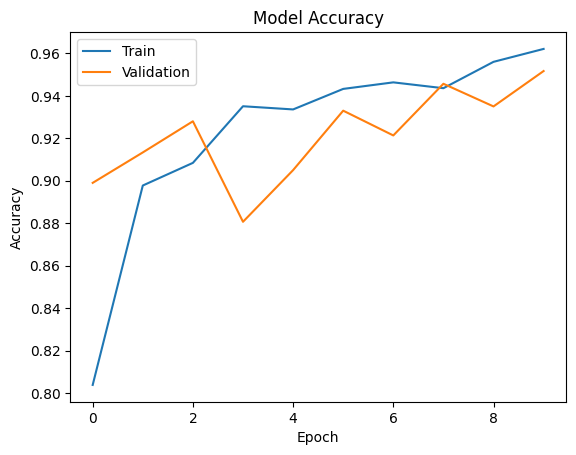

In [12]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

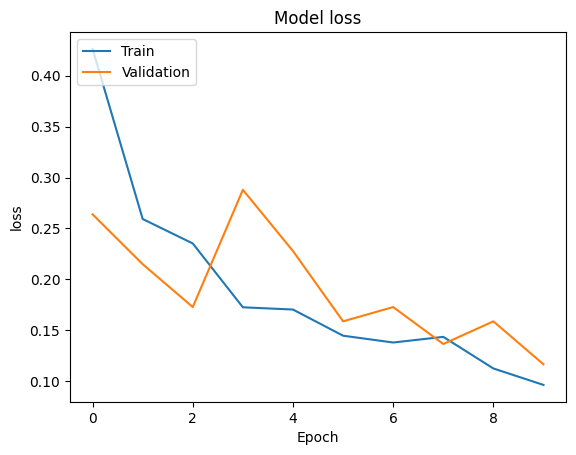

In [13]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [14]:
training_set.class_indices

{'adenocarcinoma': 0, 'benign': 1, 'squamous_cell_carcinoma': 2}

In [15]:
y_pred = classifier.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

375/375 [==============================] - 97s 257ms/step


array([0, 1, 0, ..., 1, 1, 2], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(training_set.classes, y_pred,
    target_names=list(training_set.class_indices.keys())))

                         precision    recall  f1-score   support

         adenocarcinoma       0.32      0.32      0.32      4000
                 benign       0.33      0.33      0.33      4000
squamous_cell_carcinoma       0.34      0.34      0.34      4000

               accuracy                           0.33     12000
              macro avg       0.33      0.33      0.33     12000
           weighted avg       0.33      0.33      0.33     12000



### enrégistrement du model

In [17]:
classifier.save('./model.keras')